# Data Cleaninig-Missing Value Imputation

    Missing Value Imputation: Mean and Median  

In [1]:
#import all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#load data set from local disk

df=pd.read_csv(r"D:\Online course\Data Anaysis Project\Data Cleaning\house-prices-advanced-regression-techniques\train.csv")

In [19]:
#To understand the data and identifing missing values

df.shape


(1460, 81)

In [20]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [21]:
df.tail()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
# To findout how many values are missing in data
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [24]:
# To have view all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [26]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [32]:
missing_value_percent=df.isnull().sum()/df.shape[0]*100
missing_value_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [28]:
#The percetage of total missing value in data set which have more than 20% missing value
missing_value_columns=missing_value_percent[missing_value_percent>20].keys()
missing_value_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [33]:
#Droping the the columns which have more 205 missing value
df2_dropped_columns=df.drop(columns=missing_value_columns)
df2_dropped_columns.shape


(1460, 76)

In [37]:
#To identify the columns which numerical values
df3_numerical_column=df2_dropped_columns.select_dtypes(include=['int64', 'float64'])
df3_numerical_column.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

<AxesSubplot:>

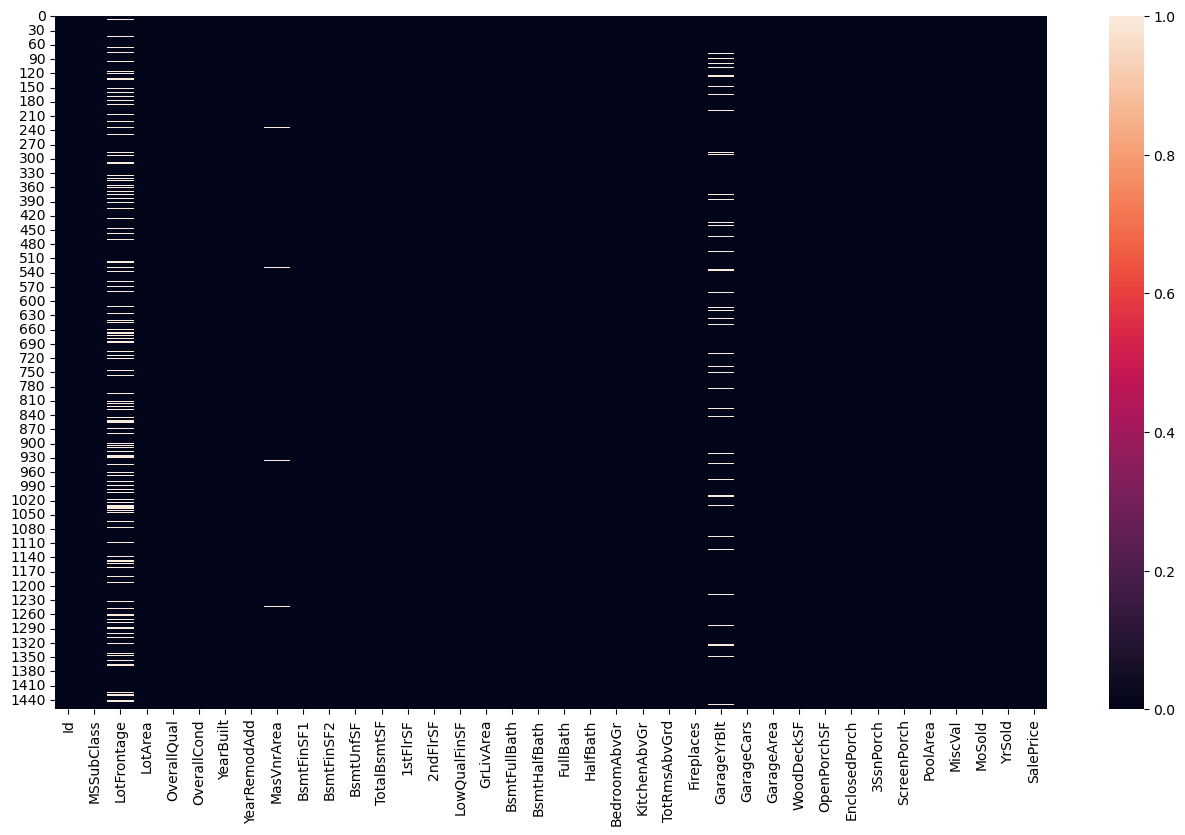

In [39]:
#To visulaize the numeric value column with missing value, let's create the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df3_numerical_column.isnull())

In [40]:
df3_numerical_column[df3_numerical_column.isnull().any(axis=1)]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
7        8          60          NaN    10382            7            6   
12      13          20          NaN    12968            5            6   
14      15          20          NaN    10920            6            5   
16      17          20          NaN    11241            6            7   
24      25          20          NaN     8246            5            8   
31      32          20          NaN     8544            5            6   
39      40          90         65.0     6040            4            5   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
48      49         190         33.0     4456            4            5   
50      51          60          NaN    13869            6            6   
64      65          60          NaN     9375            7            5   
66      67          20          NaN    19900            7            5   
76      77          20          NaN     8475            4            7   
78      79          90         72.0    10778            4            5   
84      85          80          NaN     8530            7            5   
88      89          50        105.0     8470            3            2   
89      90          20         60.0     8070            4            5   
95      96          60          NaN     9765            6            8   
99     100          20         77.0     9320            4            5   
100    101          20          NaN    10603            6            7   
104    105          50          NaN     7758            7            4   
108    109          50         85.0     8500            5            7   
111    112          80          NaN     7750            7            5   
113    114          20          NaN    21000            6            5   
116    117          20          NaN    11616            5            5   
120    121          80          NaN    21453            6            5   
125    126         190         60.0     6780            6            8   
126    127         120          NaN     4928            6            5   
127    128          45         55.0     4388            5            7   
131    132          60          NaN    12224            6            5   
133    134          20          NaN     6853            8            5   
136    137          20          NaN    10355            5            5   
140    141          20         70.0    10500            4            5   
147    148          60          NaN     9505            7            5   
148    149          20         63.0     7500            7            5   
149    150          50          NaN     6240            5            4   
152    153          60          NaN    14803            6            5   
153    154          20          NaN    13500            6            7   
155    156          50         60.0     9600            6            5   
160    161          20          NaN    11120            6            6   
163    164          45         55.0     5500            4            6   
165    166         190         62.0    10106            5            7   
166    167          20          NaN    10708            5            5   
169    170          20          NaN    16669            8            6   
170    171          50          NaN    12358            5            6   
177    178          50          NaN    13650            5            5   
180    181         160          NaN     2117            6            5   
186    187          80          NaN     9947            7            5   
191    192          60          NaN     7472            7            9   
198    199          75         92.0     5520            6            6   
203    204         120          NaN     4438            6            5   
207    208          20          NaN    12493            4            5   
208    209  

In [41]:
df3_numerical_column.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [43]:
#Identifying the columns with null value and sum of missing value


missing_num_var = [var for var in df3_numerical_column if df3_numerical_column[var].isnull().sum() > 0]
missing_num_var


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

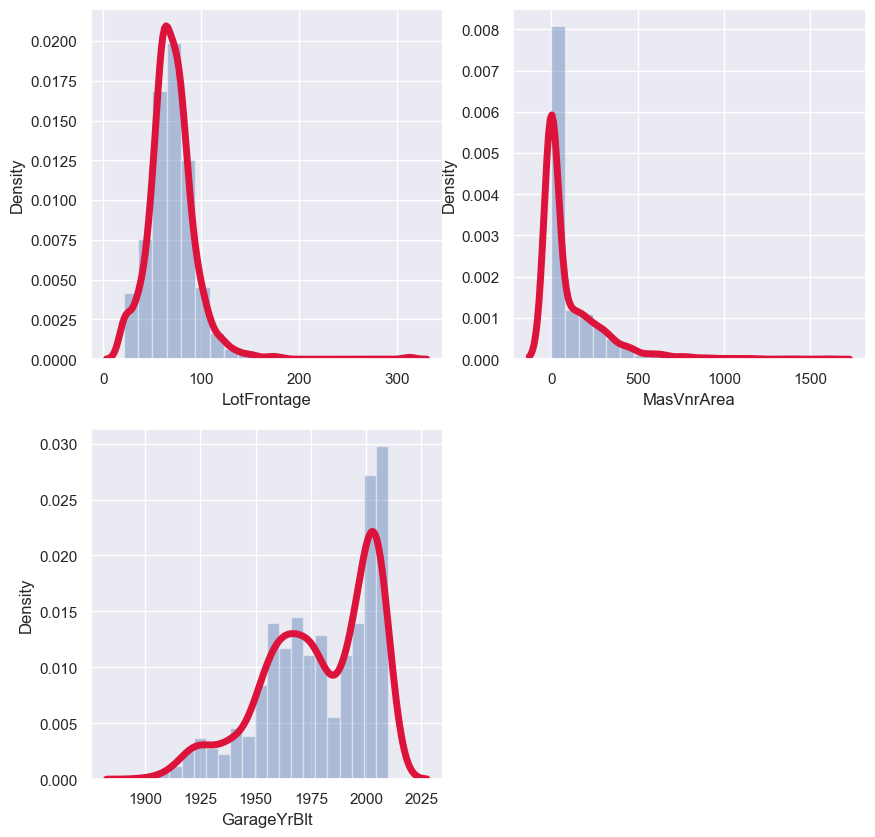

In [46]:
#To visulaization of missing value distribution 
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_numerical_column[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})
    
    
# data is randomly distributed
# 1st graph show data is symmetric so we can use mean
#2 and 3 graph shows data is skwed we can use median

In [47]:
#to fill the missing value column with mean values

df4=df3_numerical_column.fillna(df3_numerical_column.mean())
df4

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60    65.000000     8450            7            5   
1        2          20    80.000000     9600            6            8   
2        3          60    68.000000    11250            7            5   
3        4          70    60.000000     9550            7            5   
4        5          60    84.000000    14260            8            5   
5        6          50    85.000000    14115            5            5   
6        7          20    75.000000    10084            8            5   
7        8          60    70.049958    10382            7            6   
8        9          50    51.000000     6120            7            5   
9       10         190    50.000000     7420            5            6   
10      11          20    70.000000    11200            5            5   
11      12          60    85.000000    11924            9            5   
12      13          20    70.049958    12968            5            6   
13      14          20    91.000000    10652            7            5   
14      15          20    70.049958    10920            6            5   
15      16          45    51.000000     6120            7            8   
16      17          20    70.049958    11241            6            7   
17      18          90    72.000000    10791            4            5   
18      19          20    66.000000    13695            5            5   
19      20          20    70.000000     7560            5            6   
20      21          60   101.000000    14215            8            5   
21      22          45    57.000000     7449            7            7   
22      23          20    75.000000     9742            8            5   
23      24         120    44.000000     4224            5            7   
24      25          20    70.049958     8246            5            8   
25      26          20   110.000000    14230            8            5   
26      27          20    60.000000     7200            5            7   
27      28          20    98.000000    11478            8            5   
28      29          20    47.000000    16321            5            6   
29      30          30    60.000000     6324            4            6   
30      31          70    50.000000     8500            4            4   
31      32          20    70.049958     8544            5            6   
32      33          20    85.000000    11049            8            5   
33      34          20    70.000000    10552            5            5   
34      35         120    60.000000     7313            9            5   
35      36          60   108.000000    13418            8            5   
36      37          20   112.000000    10859            5            5   
37      38          20    74.000000     8532            5            6   
38      39          20    68.000000     7922            5            7   
39      40          90    65.000000     6040            4            5   
40      41          20    84.000000     8658            6            5   
41      42          20   115.000000    16905            5            6   
42      43          85    70.049958     9180            5            7   
43      44          20    70.049958     9200            5            6   
44      45          20    70.000000     7945            5            6   
45      46         120    61.000000     7658            9            5   
46      47          50    48.000000    12822            7            5   
47      48          20    84.000000    11096            8            5   
48      49         190    33.000000     4456            4            5   
49      50          20    66.000000     7742            5            7   
50      51          60    70.049958    13869            6            6   
51      52          50    52.000000     6240            6            6   
52      53          90   110.000000     8472            5            5   
53      54  

In [48]:
# to check that is there any value still missing. O value out show no cell is null in data set
df4.isnull().sum().sum()

0

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

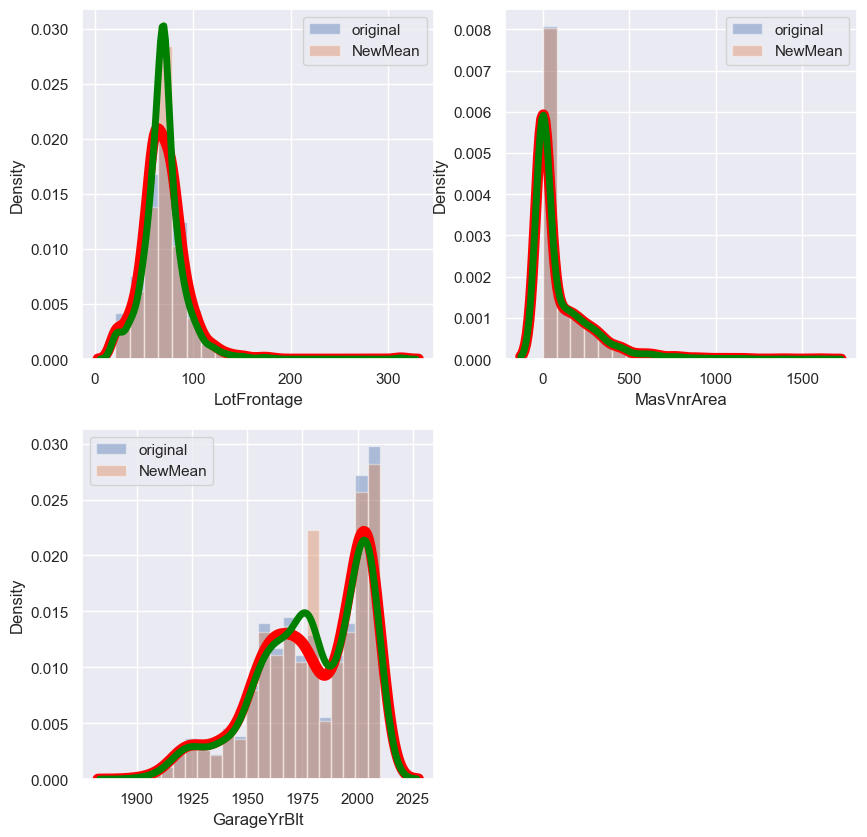

In [49]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_numerical_column[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label='original')
    sns.distplot(df4[var], bins=20, kde_kws={'linewidth':5, 'color':'green'}, label='NewMean')
    plt.legend()
    

In [51]:
# here replaceing the missing values with median
df5_median=df3_numerical_column.fillna(df3_numerical_column.median())
df5_median

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         69.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         69.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         69.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         69.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         69.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         69.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         69.0     9180            5            7   
43      44          20         69.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         69.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [53]:
df5_median.isnull().sum().sum()

0

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

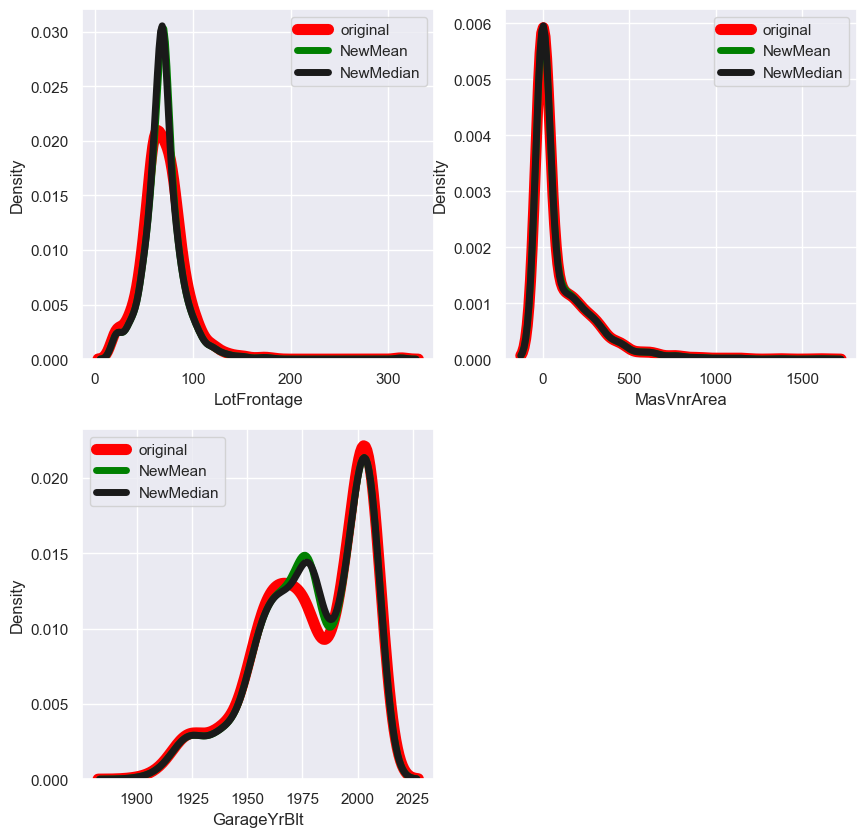

In [54]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_numerical_column[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label='original')
    sns.distplot(df4[var], bins=20, hist=False, kde_kws={'linewidth':5, 'color':'green'}, label='NewMean')
    sns.distplot(df5_median[var], bins=20, hist=False, kde_kws={'linewidth':5, 'color':'k'}, label='NewMedian')
    plt.legend()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

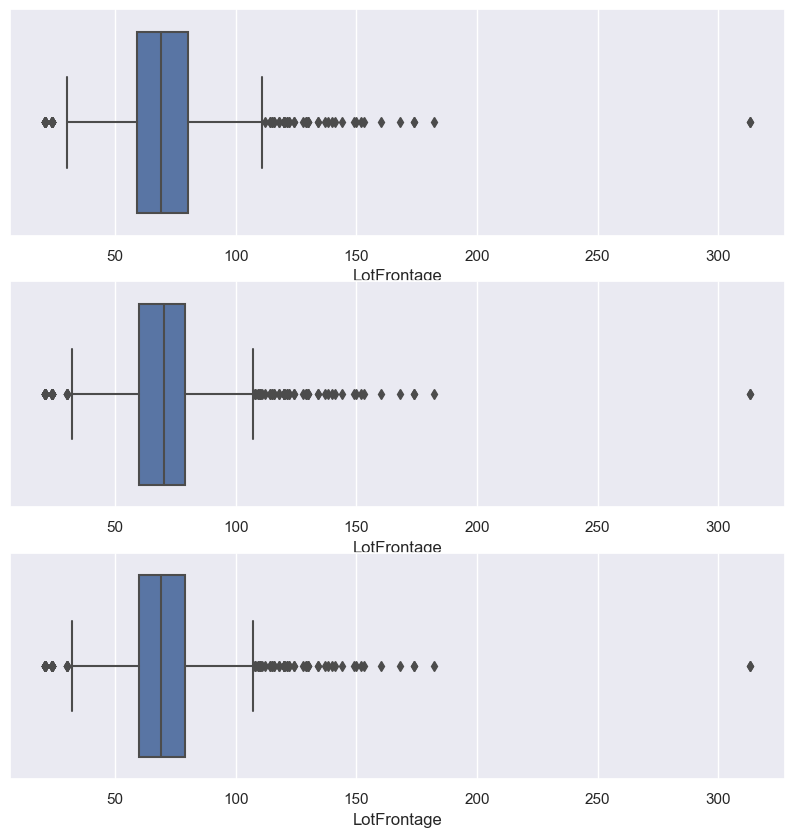

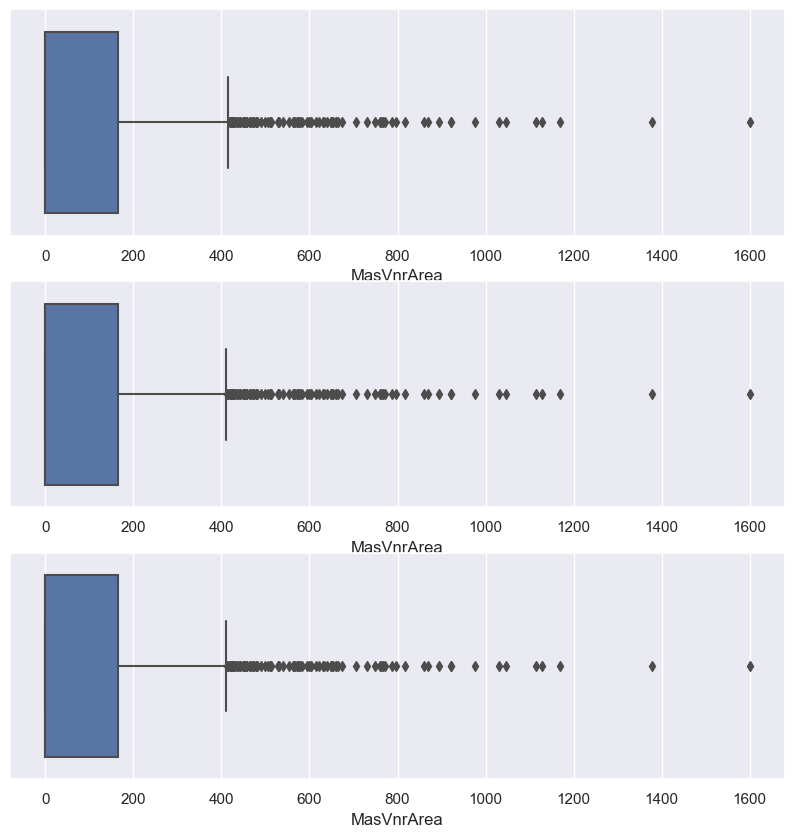

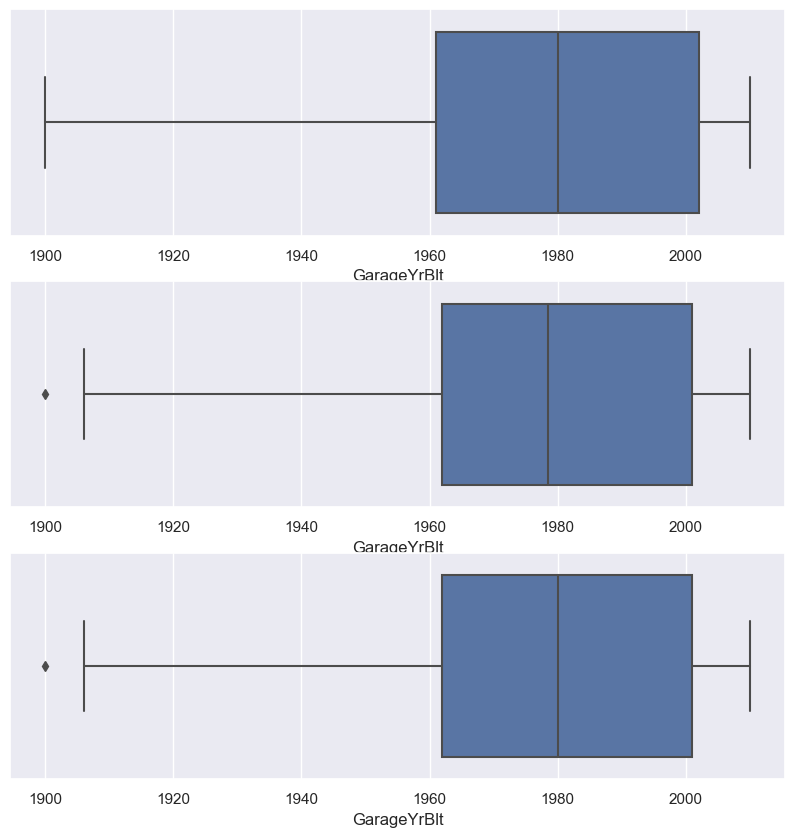

In [55]:
#To findout the outliers 
for i,  var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df4[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5_median[var])